## Resolviendo Ecuaciones Diferenciales Ordinarias con Julia

    1. Algunos métodos básicos
    2. Uso de la librería DifferentialEquations

In [2]:
using Plots

In [3]:
include("odes_lib.jl")

RK4 (generic function with 2 methods)

In [4]:
function oscilador(u, t, p)
    α, β , ω = p
    return [α*u[2] ; -α*u[1] + β*cos(ω * t)]
end

oscilador (generic function with 1 method)

In [5]:
u0 = [1. ; 0.]
intervalo = (0., 10.)
p = (1.0, 0.0, 0.0)
N = 100
ODEproblem(RK4,oscilador,u0,intervalo,N,p)

([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.090909090909095, 9.191919191919196, 9.292929292929296, 9.393939393939396, 9.494949494949497, 9.595959595959597, 9.696969696969697, 9.797979797979798, 9.898989898989898, 9.999999999999998], [1.0 0.99490281733178 … -0.8896561211993852 -0.8390756193948381; 0.0 -0.10083833265141295 … 0.4566295458500776 0.5440134615380428])

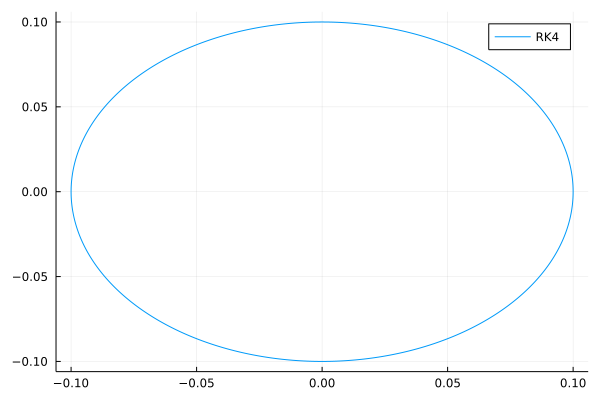

In [12]:
N=10000
y0 = [0.1;0.0]
intervalo = (0.,100.)
t_s1, y_s1 = ODEproblem(Euler, oscilador, y0, intervalo, N, p)
t_s2, y_s2 = ODEproblem(RK2, oscilador, y0, intervalo, N, p)
t_s4, y_s4 = ODEproblem(RK4, oscilador, y0, intervalo, N, p)

#plot(y_s1[1,:],y_s1[2,:], label="Euler")
#plot(y_s2[1,:],y_s2[2,:], label="RK2")
plot(y_s4[1,:],y_s4[2,:], label="RK4")

Ahora vamos a usar una librería [https://diffeq.sciml.ai/stable/tutorials/ode_example/](https://diffeq.sciml.ai/stable/tutorials/ode_example/)

In [13]:
#import Pkg; Pkg.add("OrdinaryDiffEq")
using OrdinaryDiffEq
#import Pkg; Pkg.add("DifferentialEquations")
using DifferentialEquations

In [15]:
function lorenz!(du,u,p,t)
    du[1] = p[1]*(u[2]-u[1])
    du[2] = u[1]*(p[2]-u[3]) - u[2]
    du[3] = u[1]*u[2] - p[3]*u[3]
end

lorenz! (generic function with 1 method)

In [20]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
pl = (10.0, 38.0, 8/3)
prob = OrdinaryDiffEq.ODEProblem(lorenz!,u0,tspan,pl)
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: 3rd order Hermite
t: 10001-element Vector{Float64}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.060000000000000005
   0.07
   0.08
   0.09
   0.09999999999999999
   0.10999999999999999
   0.11999999999999998
   ⋮
  99.8900000000142
  99.9000000000142
  99.91000000001421
  99.92000000001421
  99.93000000001422
  99.94000000001422
  99.95000000001423
  99.96000000001423
  99.97000000001424
  99.98000000001424
  99.99000000001425
 100.0
u: 10001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.922613231549327, 0.3620629866143094, 0.0017209581217702396]
 [0.8857117522317431, 0.6991069217518566, 0.006402212133092168]
 [0.8837775500879228, 1.0255573283686037, 0.01374777444745002]
 [0.9130940036309887, 1.3539587577975865, 0.02391412693758873]
 [0.9714268440832021, 1.6956028500255178, 0.03743787025392163]
 [1.0577896377851046, 2.061045443680743, 0.05522893577804207]
 [1.1722765488775364, 2.4605398068103423, 0.07861529189298856]
 [1.3159490540497747,

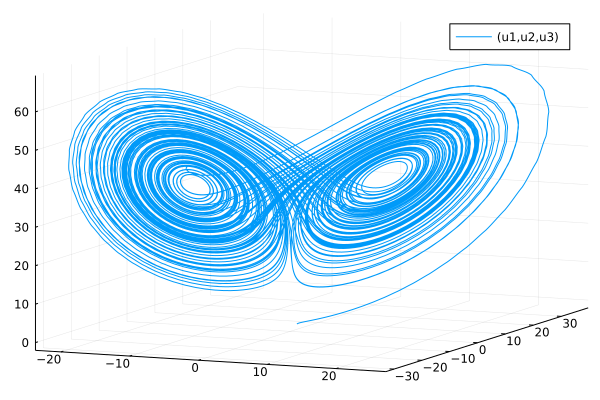

In [21]:
plot(sol,vars=(1,2,3))

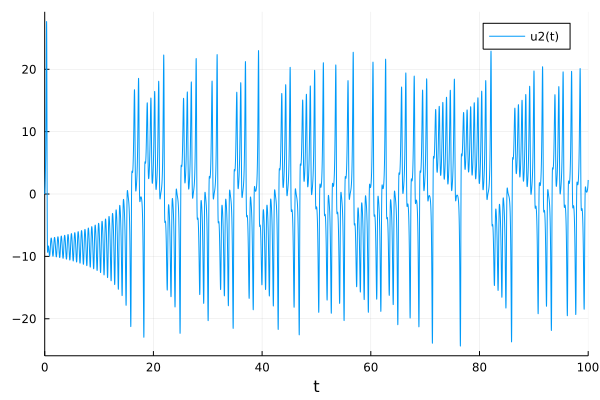

In [16]:
plot(sol,vars=(0,2))

In [23]:
function pelota(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1] - p[2]*u[2]
  end

function condition(u,t,integrator) # Event when event_f(u,t) == 0
    u[1]
end

function affect!(integrator)
    integrator.u[2] = -integrator.u[2]
end

cb = ContinuousCallback(condition,affect!)

u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = [9.8, 0.10]
prob = ODEProblem(pelota,u0,tspan,p)
sol = solve(prob,Tsit5(),callback=cb)
plot(sol)


┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/reula/.julia/packages/SciMLBase/pr0Dt/src/integrator_interface.jl:331


### Cientos de métodos! [https://diffeq.sciml.ai/stable/solvers/ode_solve/](https://diffeq.sciml.ai/stable/solvers/ode_solve/)

Otras propiedades:

1. Manejando, paralelizando (threads, MPI, GPU) y analizando grandes sistemas (Monte Carlo)
2. Almacenado en formatos tabulados `DataFrames` and `CSV`s
3. Manejo de eventos
4. Estimación de Parametros (problemas inversos, ML) 
5. Quantificación de los errores numéricos y propagación de errores 
6. Vinculación con Symbolics

